<a href="https://colab.research.google.com/github/felipeapgodoi/MetodosNumericos2020_3/blob/master/ComparaMetodosDeResolucaoDeSistemasDeEquacoesAlgebricasLineares_FelipeGodoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Universidade Federal de Uberlândia
# Programa de Pós Graduação Em Engenharia Química
# Métodos Numéricos Aplicados à Engenharia Química
# Aluno: Felipe Augusto Paes de Godoi
# Atividade 02: Comparação de métodos de resolução de sistemas de equações algébricas lineares
# Métodos avaliados: Eliminação de Gauss com pivotamento, Jacobi, Gauss-Seidel, SOR, Numpy


In [ ]:
import numpy as np
import numpy.linalg as npla
import time
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/felipeapgodoi/MetodosNumericos2020_3 #clonar do Github
%cd MetodosNumericos2020_3

Cloning into 'MetodosNumericos2020_3'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (131/131), done.
remote: Total 133 (delta 69), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (133/133), 251.36 KiB | 9.31 MiB/s, done.
Resolving deltas: 100% (69/69), done.
/content/MetodosNumericos2020_3


In [ ]:
from GaussPivot import gauss
from GaussSeidel import gauss_seidel
from Jacobi import jacobi
from SOR import SOR


/content/MetodosNumericos2020_3/GaussSeidel.py:40: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/GaussSeidel.py:35: RuntimeWarning: invalid value encountered in double_scalars
  sum1 += A[i,j]*x_new[j]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/SOR.py:43: RuntimeWarning: invalid value encountered in double_scalars
  x_new[i] = omega*x_new[i]+(1-omega)*x[i]
/content/MetodosNumericos2020_3/SOR.py:41: RuntimeWarning: overflow encountered in double_scalars
  x_new[i] = (f[i]-sum1-sum2)/A[i,i]
/content/MetodosNumericos2020_3/Jacobi.py:33: RuntimeWarning: overflow encountered in double_scalars
  xnew[i] = (f[i] - sum)/A[i,i]
/content/MetodosNumericos2020_3/Jacobi.py:32: RuntimeWarning: overflow encountered in double_scalars
  sum += A[i,j]*x[j]
/content/MetodosNumericos2020_3/SOR.py:36: 

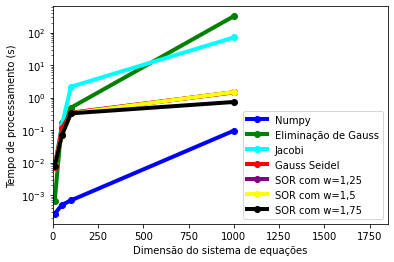

In [ ]:
# size of the matrix to be calculated
SIZE = [10,50,100,1000]

# create list
cpu_time_numpy = []
cpu_time_eliminacaodegauss = []
cpu_time_gaussseidel = []
cpu_time_jacobi = []
cpu_time_SOR125 = []
cpu_time_SOR150 = []
cpu_time_SOR175 = []

# loop over the size
for size in SIZE :
  # create the system
  A = np.random.rand(size,size)
  f = np.random.rand(size)

  # numpy
  t0 = time.clock()
  w=npla.solve(A,f)
  cpu_time_numpy.append(time.clock()-t0)

  # eliminacaodegauss
  t0 = time.clock()
  x= gauss(A,f)
  cpu_time_eliminacaodegauss.append(time.clock()-t0)

  # gaussseidel
  t0 = time.clock()
  x0= np.random.rand(size)
  y = gauss_seidel(A,f,x0)
  cpu_time_gaussseidel.append(time.clock()-t0)

  # jacobi
  t0 = time.clock()
  x= np.random.rand(size)
  z = jacobi(A,f,x)
  cpu_time_jacobi.append(time.clock()-t0)

  # sor125: sor com omega igual a 1,25
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.25
  x = SOR(A,f,x0,omega)
  cpu_time_SOR125.append(time.clock()-t0)

  # sor150: sor com omega igual 1,5
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.5
  x = SOR(A,f,x0,omega)
  cpu_time_SOR150.append(time.clock()-t0)

  # sor175: sor com omega igual a 1,75
  t0 = time.clock()
  x0= np.random.rand(size)
  omega=1.75
  x = SOR(A,f,x0,omega)
  cpu_time_SOR175.append(time.clock()-t0)

# plot the results
plt.semilogy(SIZE,cpu_time_numpy,'o-',linewidth=4, color='blue',label='Numpy')
plt.semilogy(SIZE,cpu_time_eliminacaodegauss,'o-',linewidth=4, color='green',label='Eliminação de Gauss')
plt.semilogy(SIZE,cpu_time_jacobi,'o-',linewidth=4, color='cyan',label='Jacobi')
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='purple',label='SOR com w=1,25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR com w=1,5')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR com w=1,75')

plt.xlabel('Dimensão do sistema de equações')
plt.ylabel('Tempo de processamento (s)')
plt.xlim([0,1850])
plt.legend(loc=4)
plt.show()

In [ ]:
# Imprimindo os tempos de processamento
print (cpu_time_numpy)
print(cpu_time_eliminacaodegauss)
print(cpu_time_gaussseidel)
print(cpu_time_jacobi)
print(cpu_time_SOR125)
print(cpu_time_SOR150)
print(cpu_time_SOR175)

[0.000264000000000042, 0.0004979999999998874, 0.0006879999999997999, 0.09589499999999962]
[0.0006439999999998669, 0.17106, 0.4883510000000002, 317.94753099999997]
[0.007498000000000005, 0.113842, 0.34304999999999986, 1.4465789999999856]
[0.007444000000000006, 0.1427799999999999, 2.1539019999999995, 70.56888900000001]
[0.008026000000000089, 0.07307900000000012, 0.3324189999999998, 1.4646580000000426]
[0.008258000000000099, 0.07032499999999997, 0.32595499999999955, 1.4774110000000178]
[0.007642999999999844, 0.069388, 0.327337, 0.7329740000000129]


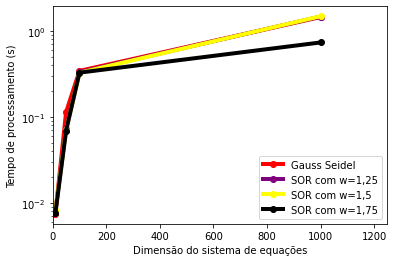

In [ ]:
#Comparação do método de Gauss-Seidel com o método SOR para três valores diferentes de omega
plt.semilogy(SIZE,cpu_time_gaussseidel,'o-',linewidth=4, color='red',label='Gauss Seidel')
plt.semilogy(SIZE,cpu_time_SOR125,'o-',linewidth=4, color='purple',label='SOR com w=1,25')
plt.semilogy(SIZE,cpu_time_SOR150,'o-',linewidth=4, color='yellow',label='SOR com w=1,5')
plt.semilogy(SIZE,cpu_time_SOR175,'o-',linewidth=4, color='black',label='SOR com w=1,75')

plt.xlabel('Dimensão do sistema de equações')
plt.ylabel('Tempo de processamento (s)')
plt.xlim([0,1250])
plt.legend(loc=4)
plt.show()